In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import os
import re
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
plt.rcParams['figure.dpi'] = 900
plt.rcParams['savefig.dpi'] = 900

In [30]:
# Load the data into a dataframe

Mode = "double_electron"


# Specify the directory path
directory_path = f"../data/Para/Data/{Mode}/"

# Get a list of files in the directory
file_list = sorted(os.listdir(directory_path))

# Regular expression pattern to extract an integer from the filenames
pattern = r'\d+'

S_electron_arr = []

# Print the list of files
print("Loading the data into a pandas dataframe")
for file_name in file_list:
    # Find all occurrences of the pattern in the string
    matches = re.findall(pattern, file_name)

    # Check if any matches were found
    if matches:
        event = int(matches[0])
    else:
        print("No integer found in the input string.")

    # Now load into a dataframe
    df = pd.read_csv(directory_path + file_name, header=None, names=["hitid", "x_init", "y_init", "z_init", "e"], delimiter=" ")
    df["eventid"] = event
    df = df.drop(columns=['hitid'])
    S_electron_arr.append(df) 

    # display(df)
    # print(file_name, event)

# merge all the loaded dataframes into one
S_electron = pd.concat(S_electron_arr, ignore_index=True)

display(S_electron)

# Write it to file
S_electron.to_csv(f"../data/Krishan/{Mode}/{Mode}_no_binning.csv", index=False, header = ["x","y", "z", "E", "eventid"] )

Loading the data into a pandas dataframe


,x_init,y_init,z_init,e,eventid
0,0.192285,-6.149754,39.853730,0.000458,0
1,0.192305,-6.149564,39.853513,0.010160,0
2,0.193359,-6.158474,39.864317,0.009947,0
3,0.179452,-6.125700,39.880239,0.002723,0
4,0.198334,-6.122885,39.924098,0.012197,0
...,...,...,...,...,...
125355,18.480577,34.211778,-34.307833,0.008434,994
125356,18.524223,34.253052,-34.352086,0.012527,994
125357,18.543787,34.259962,-34.377428,0.006176,994
125358,18.549625,34.251656,-34.363288,0.008073,994


In [31]:
# Find the min and max values of the dataset
print("x (max, min): ", min(S_electron["x_init"]), max(S_electron["x_init"]))
print("y (max, min): ", min(S_electron["y_init"]), max(S_electron["y_init"]))
print("z (max, min): ", min(S_electron["z_init"]), max(S_electron["z_init"]))
print("E (max, min): ", min(S_electron["e"]), max(S_electron["e"]))

x (max, min):  -91.6797198679 79.5226395505
y (max, min):  -81.6760589054 69.939081493
z (max, min):  -165.676086449 139.348237674
E (max, min):  5.815620774e-06 0.0728187890415


In [32]:
# Create the bins ---- 
xmin=-200
xmax=200
xbw=4

ymin=-200
ymax=200
ybw=4

zmin=-300
zmax=300
zbw=4


# bins for x, y, z
xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = np.arange(ymin, ymax+ybw, ybw)
zbins = np.arange(zmin, zmax+zbw, zbw)

# center bins for x, y, z
xbin_c = xbins[:-1] + xbw / 2
ybin_c = ybins[:-1] + ybw / 2
zbin_c = zbins[:-1] + zbw / 2

display(S_electron[ S_electron["eventid"] == 1 ])

# Now lets bin the data
S_electron['x'] = pd.cut(x=S_electron['x_init'], bins=xbins,labels=xbin_c, include_lowest=True)
S_electron['y'] = pd.cut(x=S_electron['y_init'], bins=ybins,labels=ybin_c, include_lowest=True)
S_electron['z'] = pd.cut(x=S_electron['z_init'], bins=zbins,labels=zbin_c, include_lowest=True)

# remove the initial x,y,z since we are done with them
S_electron = S_electron.drop(columns=['x_init', 'y_init', 'z_init'])

display(S_electron[ S_electron["eventid"] == 100 ])

# We have to do this stupid buisness of writing the data out and loading it 
# back in so we can rebin the data
S_electron.to_csv("temp.csv", index=False)
S_electron = pd.read_csv("temp.csv")

# Remove the file
try:
    os.remove("temp.csv")
    print(f"File removed successfully.")
except FileNotFoundError:
    print(f"File not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Group by x, y, and z and sum the 'e' values
S_electron = S_electron.groupby(['x', 'y', 'z', 'eventid'], as_index=False)['e'].sum()
display(S_electron[ S_electron["eventid"] == 1 ])

# Write it to file
S_electron = S_electron.sort_values(by=['eventid', 'z', 'x', 'y'])
S_electron.to_csv(f"../data/Krishan/{Mode}/{Mode}_bins_x{xbw}mm_y{ybw}mm_z{zbw}mm.csv", index=False, header = ["x","y", "z", "E", "eventid"] )


,x_init,y_init,z_init,e,eventid


,e,eventid,x,y,z
350,0.006738,100,26.0,-18.0,62.0
351,0.013234,100,26.0,-18.0,62.0
352,0.007723,100,26.0,-18.0,62.0
353,0.007456,100,26.0,-18.0,62.0
354,0.006343,100,26.0,-18.0,62.0
...,...,...,...,...,...
741,0.008375,100,14.0,-14.0,-26.0
742,0.011699,100,14.0,-14.0,-26.0
743,0.008207,100,14.0,-14.0,-26.0
744,0.014483,100,18.0,-14.0,-26.0


File removed successfully.


,x,y,z,eventid,e


,x,y,z,eventid,e
25854,14.0,-18.0,-26.0,100,0.027742
25965,14.0,-14.0,-26.0,100,0.089487
28060,18.0,-14.0,-26.0,100,0.112738
23260,10.0,-18.0,-22.0,100,0.012560
23392,10.0,-14.0,-22.0,100,0.033825
...,...,...,...,...,...
30845,26.0,-18.0,62.0,100,0.156477
30925,26.0,-14.0,62.0,100,0.030035
31706,30.0,-18.0,62.0,100,0.038081
31758,30.0,-14.0,62.0,100,0.008240


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_22173/187062195.py:27: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  cax = divider.append_axes("right", size="0.001%", pad=0.55)


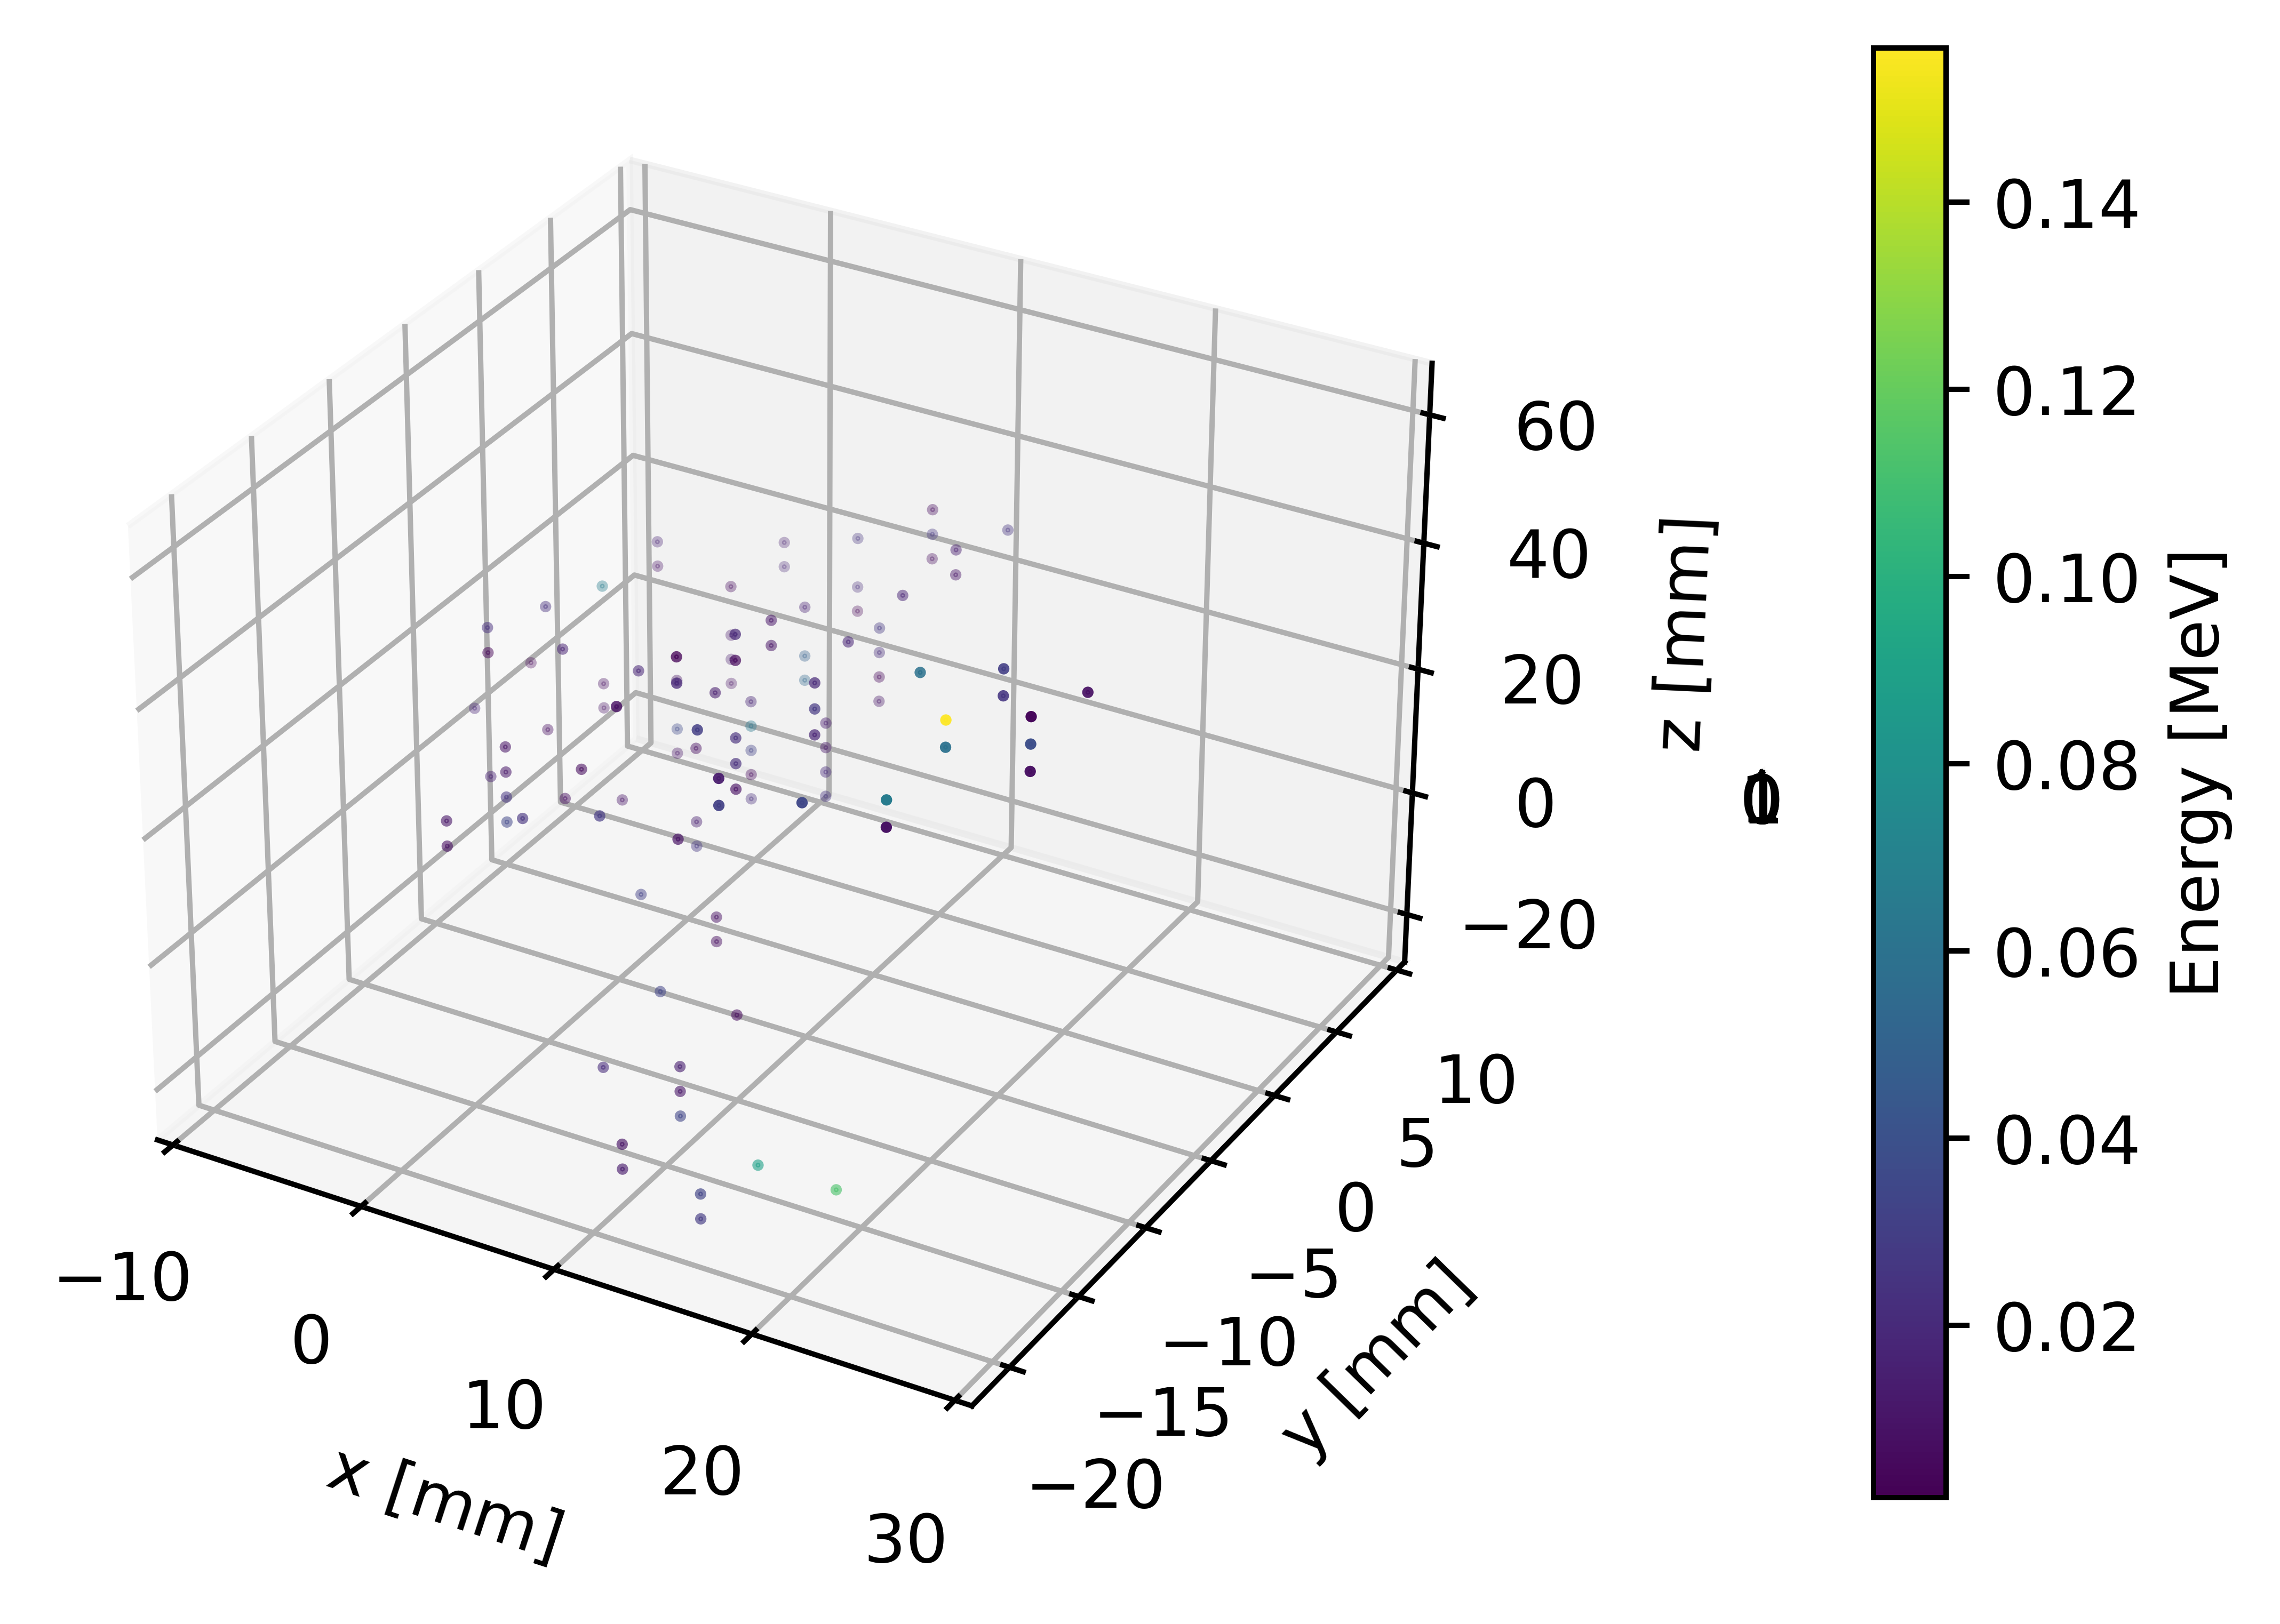

In [33]:
# Lets plot the data for an event
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_zlabel('z [mm]')

event = S_electron[ S_electron["eventid"] == 100 ]
display(event)

x = event["x"]
y = event["y"]
z = event["z"]

x_range = (x.max()-x.min()) * 0.5
y_range = (y.max()-y.min()) * 0.5
z_range = (z.max()-z.min()) * 0.5
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - x_range, mid_x + x_range)
ax.set_ylim(mid_y - y_range, mid_y + y_range)
ax.set_zlim(mid_z - z_range, mid_z + z_range)
# ax.voxels(x, y, z, facecolors=event["e"], edgecolor='k')
p = ax.scatter(x,y,z,cmap='viridis',c=event["e"],s = 0.5) #coolwarm
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="0.001%", pad=0.55)
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy [MeV]')
plt.savefig(f"../plots/{Mode}_unbinned.pdf")
plt.show()


/var/folders/tr/r0bv1gl52_vb7v8bswkb_z0nb301gc/T/ipykernel_22173/2111896873.py:66: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  cax = divider.append_axes("right", size="0.001%", pad=0.55)


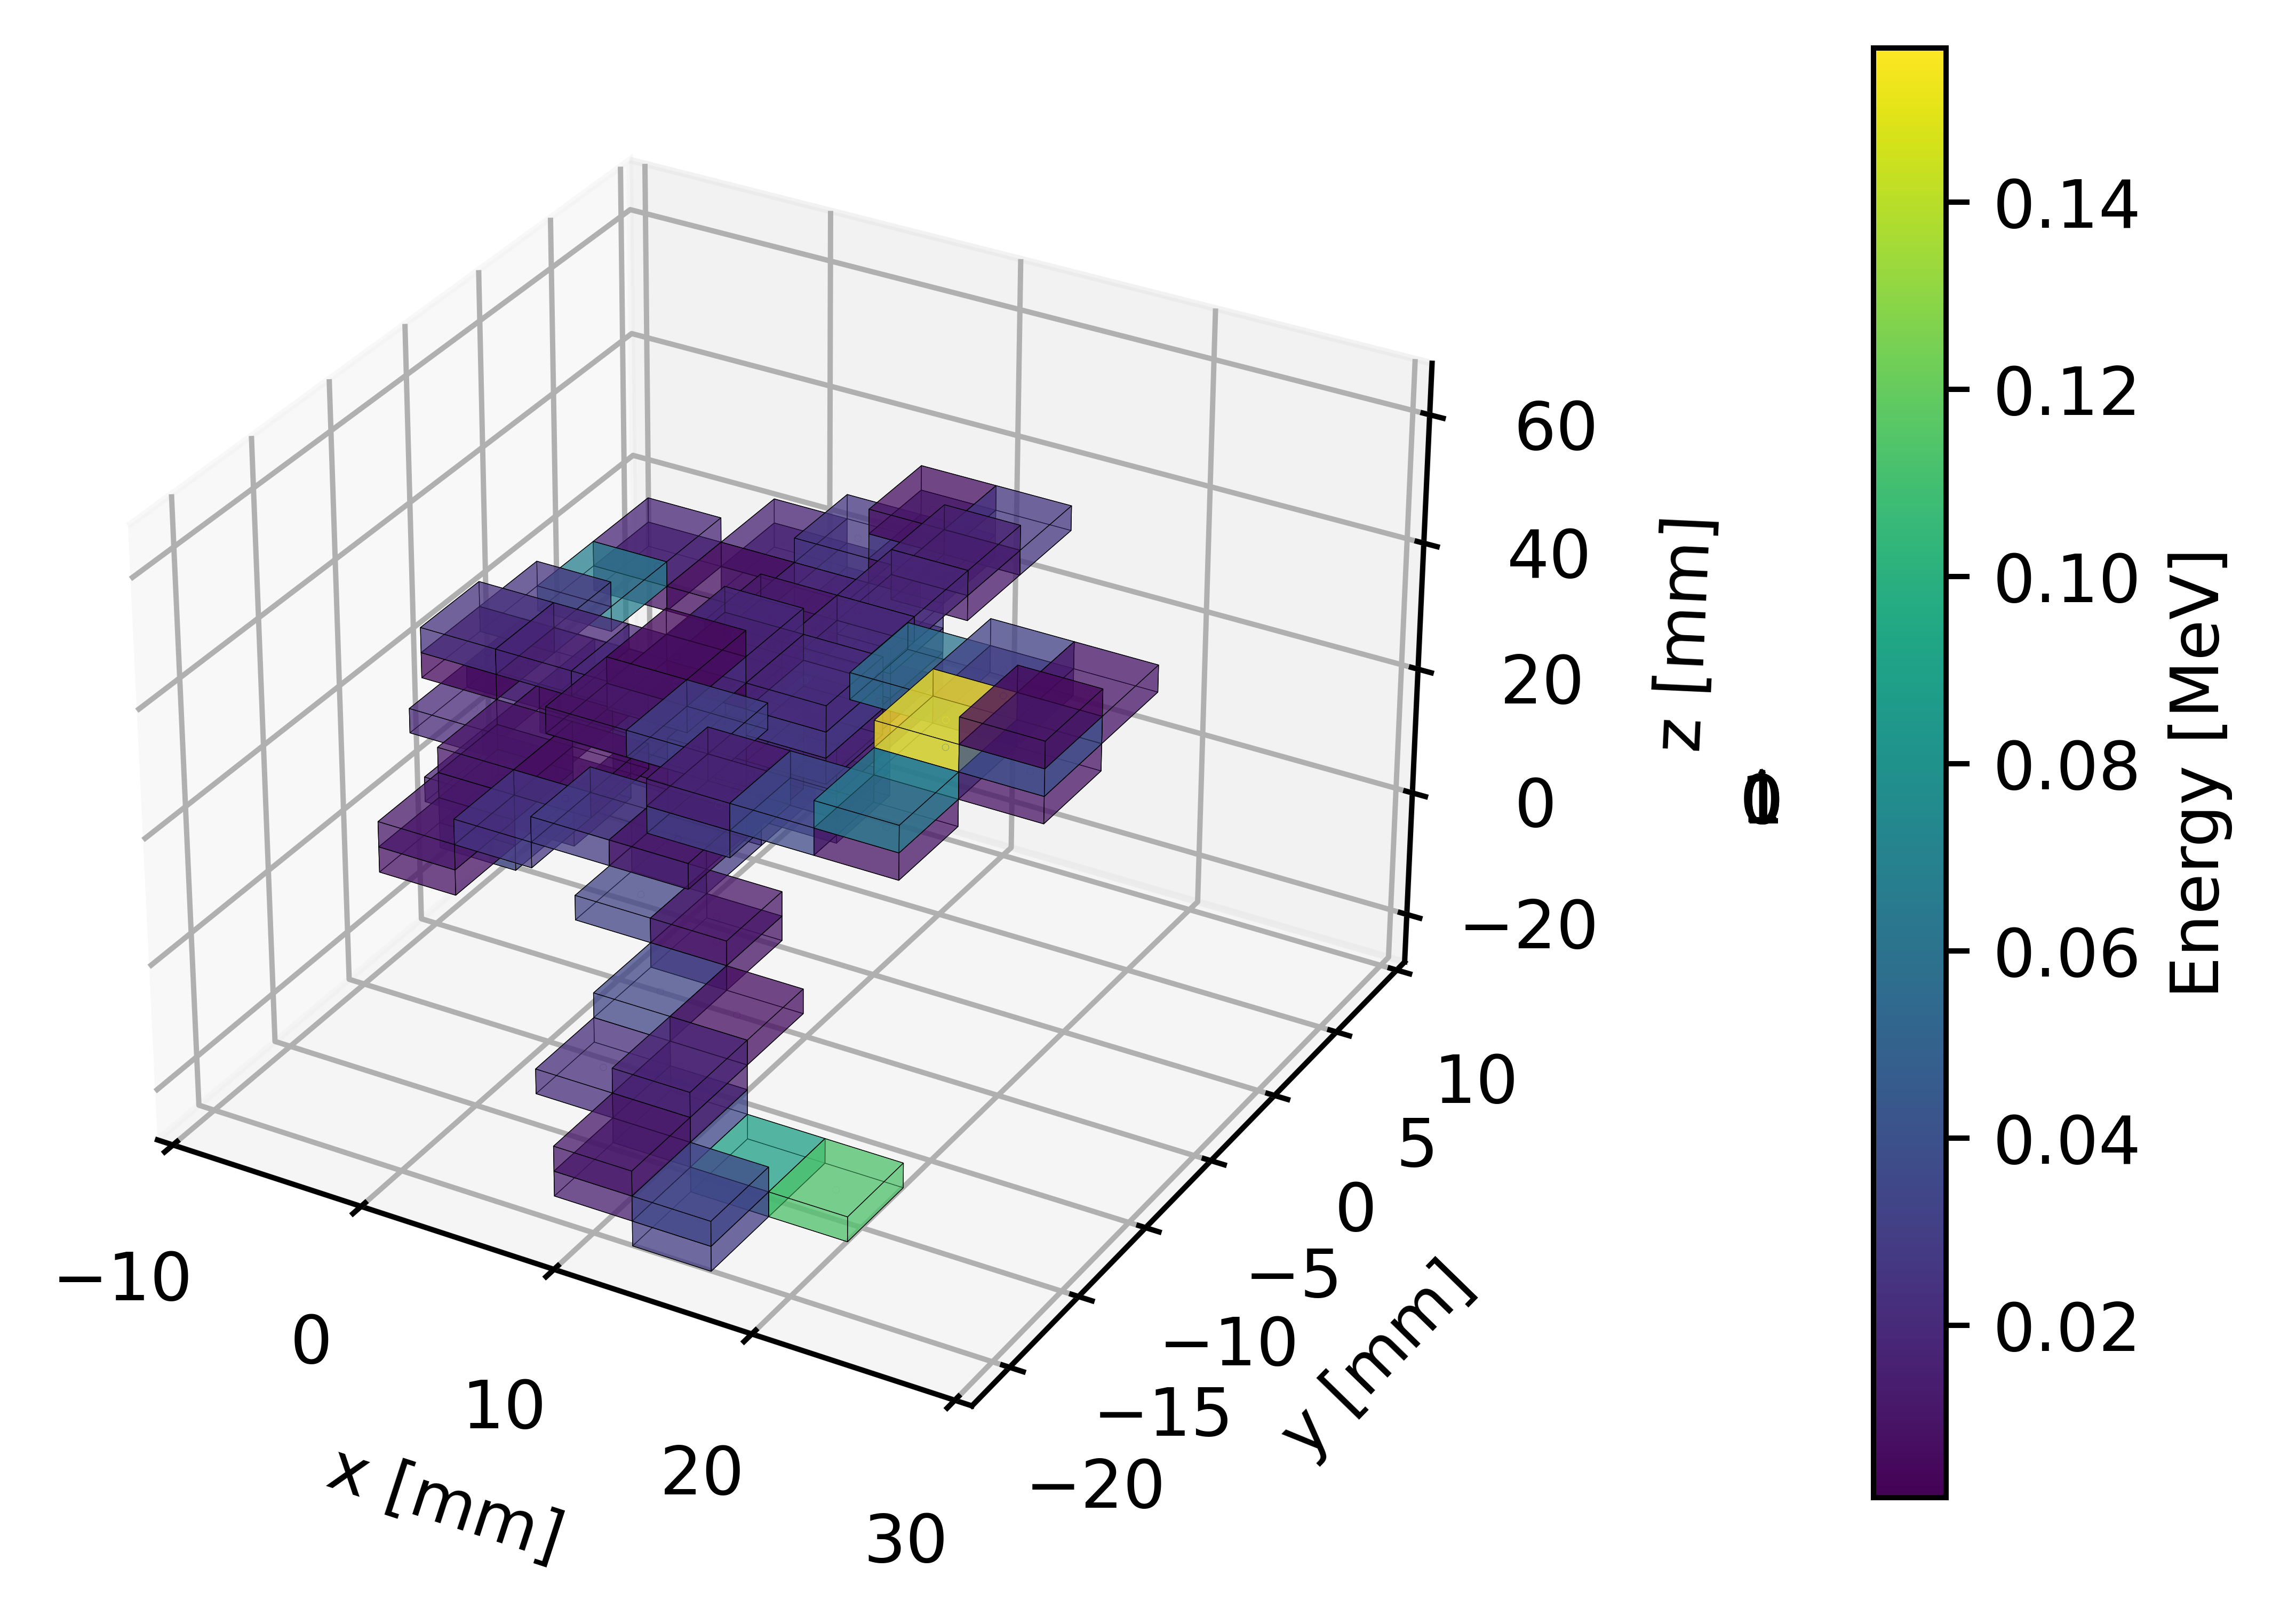

In [34]:
# Create sample data
data = np.random.randint(0, 2, size=(10, 10, 10))  # Binary data for voxel presence
weights = np.random.rand(10, 10, 10)   # Array representing weights (not normalized)


# Create a 3D scatter plot using cubes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get the indices of non-zero elements in the data
indices = np.nonzero(data)

event = S_electron[ S_electron["eventid"] == 100 ]

# Plot each voxel as a cube with corresponding color and size
# for x, y, z in zip(*indices):
for index, row in event.iterrows():
    x = row['x']
    y = row['y']
    z = row['z']
    weight = row['e']
    color = plt.cm.viridis(weight / max (event['e']))  # Scale color by weight

    # Create vertices for a cube centered at (x, y, z)
    vertices = [
        [x - xbw/2, y - ybw/2, z - zbw/2],
        [x + xbw/2, y - ybw/2, z - zbw/2],
        [x + xbw/2, y + ybw/2, z - zbw/2],
        [x - xbw/2, y + ybw/2, z - zbw/2],
        [x - xbw/2, y - ybw/2, z + zbw/2],
        [x + xbw/2, y - ybw/2, z + zbw/2],
        [x + xbw/2, y + ybw/2, z + zbw/2],
        [x - xbw/2, y + ybw/2, z + zbw/2]
    ]

    # Define the faces of the cube
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[1], vertices[2], vertices[6], vertices[5]],
        [vertices[4], vertices[7], vertices[3], vertices[0]]
    ]

    # Create a Poly3DCollection and add it to the plot
    ax.add_collection3d(Poly3DCollection(faces, facecolors=color, linewidths=0.1, edgecolors='k', alpha=0.5))


x = event["x"]
y = event["y"]
z = event["z"]

x_range = (x.max()-x.min()) * 0.5
y_range = (y.max()-y.min()) * 0.5
z_range = (z.max()-z.min()) * 0.5
mid_x = (x.max()+x.min()) * 0.5
mid_y = (y.max()+y.min()) * 0.5
mid_z = (z.max()+z.min()) * 0.5
ax.set_xlim(mid_x - x_range, mid_x + x_range)
ax.set_ylim(mid_y - y_range, mid_y + y_range)
ax.set_zlim(mid_z - z_range, mid_z + z_range)

p = ax.scatter(x,y,z,cmap='viridis',c=event["e"],s = 0.001) #coolwarm
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="0.001%", pad=0.55)
cb = fig.colorbar(p, ax=ax)
cb.set_label('Energy [MeV]')

ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
ax.set_zlabel('z [mm]')
plt.savefig(f"../plots/{Mode}_binned_bins_x{xbw}mm_y{ybw}mm_z{zbw}mm.csv.pdf")

plt.show()

